In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Set plot style
plt.style.use('seaborn')

In [2]:
# 1. Data Loading
print("Loading dataset...")
data = pd.read_csv('natural_disasters_dataset.csv')

Loading dataset...


### 2. Basic EDA

In [3]:
print("\nDataset Info:")
print(data.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16126 entries, 0 to 16125
Data columns (total 45 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        16126 non-null  int64  
 1   Seq                         16126 non-null  int64  
 2   Glide                       1581 non-null   object 
 3   Disaster Group              16126 non-null  object 
 4   Disaster Subgroup           16126 non-null  object 
 5   Disaster Type               16126 non-null  object 
 6   Disaster Subtype            13016 non-null  object 
 7   Disaster Subsubtype         1077 non-null   object 
 8   Event Name                  3861 non-null   object 
 9   Country                     16126 non-null  object 
 10  ISO                         16126 non-null  object 
 11  Region                      16126 non-null  object 
 12  Continent                   16126 non-null  object 
 13  Location        

In [4]:
print("\nFirst 5 rows:")
print(data.head())


First 5 rows:
   Year   Seq Glide Disaster Group Disaster Subgroup      Disaster Type  \
0  1900  9002   NaN        Natural    Climatological            Drought   
1  1900  9001   NaN        Natural    Climatological            Drought   
2  1902    12   NaN        Natural       Geophysical         Earthquake   
3  1902     3   NaN        Natural       Geophysical  Volcanic activity   
4  1902    10   NaN        Natural       Geophysical  Volcanic activity   

  Disaster Subtype Disaster Subsubtype   Event Name     Country  ...  \
0          Drought                 NaN          NaN  Cabo Verde  ...   
1          Drought                 NaN          NaN       India  ...   
2  Ground movement                 NaN          NaN   Guatemala  ...   
3         Ash fall                 NaN  Santa Maria   Guatemala  ...   
4         Ash fall                 NaN  Santa Maria   Guatemala  ...   

  No Affected No Homeless Total Affected Insured Damages ('000 US$)  \
0         NaN         NaN     

In [5]:
# Check missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
Year                              0
Seq                               0
Glide                         14545
Disaster Group                    0
Disaster Subgroup                 0
Disaster Type                     0
Disaster Subtype               3110
Disaster Subsubtype           15049
Event Name                    12265
Country                           0
ISO                               0
Region                            0
Continent                         0
Location                       1792
Origin                        12332
Associated Dis                12778
Associated Dis2               15419
OFDA Response                 14432
Appeal                        13557
Declaration                   12870
Aid Contribution              15449
Dis Mag Value                 11180
Dis Mag Scale                  1190
Latitude                      13397
Longitude                     13394
Local Time                    15023
River Basin                   14839
Start Year 

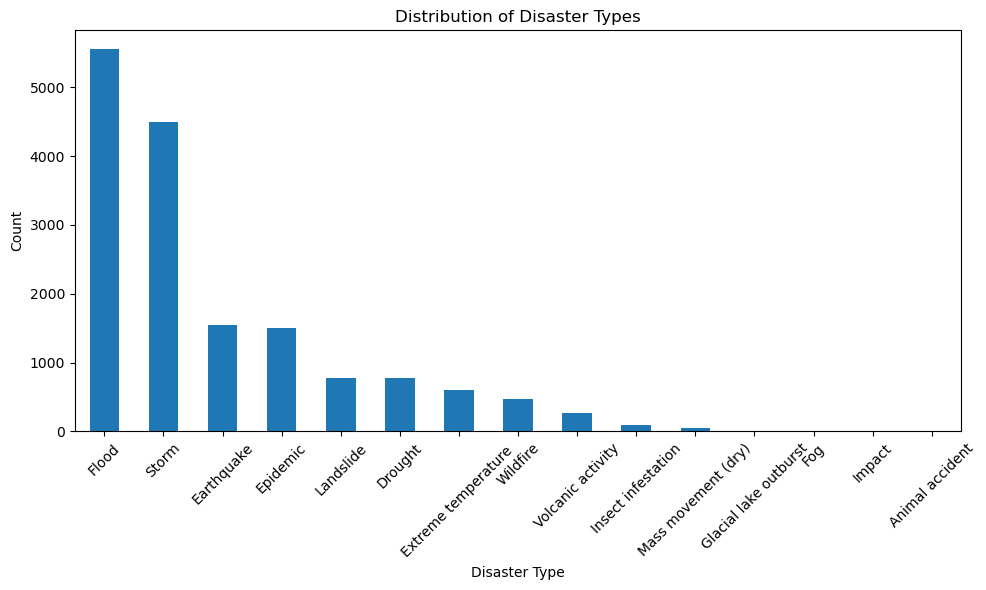

In [6]:
# 3. Simple Visualization
# Disaster Type Distribution
plt.figure(figsize=(10, 6))
data['Disaster Type'].value_counts().plot(kind='bar')
plt.title('Distribution of Disaster Types')
plt.xlabel('Disaster Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [7]:
# 4. Data Preprocessing
print("\nHandling preprocessing...")
# Select features
features = ['Year', 'Dis Mag Value', 'Dis Mag Scale', 'Latitude', 'Longitude', 'Disaster Type']
data_selected = data[features].copy()


Handling preprocessing...


In [8]:
# Convert to numeric, handling non-numeric values
for col in ['Year', 'Dis Mag Value', 'Dis Mag Scale', 'Latitude', 'Longitude']:
    data_selected[col] = pd.to_numeric(data_selected[col], errors='coerce')

In [9]:
# Handle missing values
print("\nHandling missing values...")
data_selected = data_selected.replace('nan', np.nan)


Handling missing values...


In [10]:
# Impute numerical columns with mean
num_cols = ['Year', 'Dis Mag Value', 'Dis Mag Scale', 'Latitude', 'Longitude']

# Convert to numeric first, handling non-numeric values
for col in num_cols:
    data_selected[col] = pd.to_numeric(data_selected[col], errors='coerce')

# Then impute
imputer = SimpleImputer(strategy='mean')
imputed_array = imputer.fit_transform(data_selected[num_cols])

# Assign back, handling skipped columns
valid_cols = [col for col, stat in zip(num_cols, imputer.statistics_) if not np.isnan(stat)]
data_selected[valid_cols] = imputed_array

# Explicitly handle columns with all NaN (like Dis Mag Scale)
for col in num_cols:
    if col not in valid_cols:
        data_selected[col] = 0  # or np.nan if you prefer

C:\Users\PARAM\anaconda3\Lib\site-packages\sklearn\impute\_base.py:577: UserWarning: Skipping features without any observed values: ['Dis Mag Scale']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


In [11]:
# Encode target variable
le = LabelEncoder()
data_selected['Disaster Type'] = le.fit_transform(data_selected['Disaster Type'])

In [12]:
# Check for any remaining missing values
print("\nMissing values after imputation:")
print(data_selected.isnull().sum())


Missing values after imputation:
Year             0
Dis Mag Value    0
Dis Mag Scale    0
Latitude         0
Longitude        0
Disaster Type    0
dtype: int64


In [13]:
# 5. Prepare data for ML
X = data_selected.drop('Disaster Type', axis=1)
y = data_selected['Disaster Type']

In [14]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
# 6. Machine Learning Models
# Random Forest
print("\nTraining Random Forest...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train_scaled, y_train)
rf_pred = rf_model.predict(X_test_scaled)
rf_accuracy = accuracy_score(y_test, rf_pred)


Training Random Forest...


In [24]:
# KNN
print("Training KNN...")
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)
knn_pred = knn_model.predict(X_test_scaled)
knn_accuracy = accuracy_score(y_test, knn_pred)

Training KNN...


In [25]:
# SVM
print("Training SVM...")
svm_model = SVC(random_state=42)
svm_model.fit(X_train_scaled, y_train)
svm_pred = svm_model.predict(X_test_scaled)
svm_accuracy = accuracy_score(y_test, svm_pred)

Training SVM...


In [26]:
# 7. Results
print("\nModel Performance:")
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")
print(f"KNN Accuracy: {knn_accuracy:.4f}")
print(f"SVM Accuracy: {svm_accuracy:.4f}")


Model Performance:
Random Forest Accuracy: 0.3807
KNN Accuracy: 0.4879
SVM Accuracy: 0.4225


In [27]:
# Detailed classification report for best model (Random Forest)
print("\nRandom Forest Classification Report:")
# Use the encoded labels directly and map to class names
labels = range(len(le.classes_))
print(classification_report(y_test, rf_pred, labels=labels, target_names=le.classes_, zero_division=0))


Random Forest Classification Report:
                       precision    recall  f1-score   support

      Animal accident       0.00      0.00      0.00         0
              Drought       0.08      0.18      0.11       157
           Earthquake       0.98      0.95      0.97       307
             Epidemic       0.27      0.37      0.31       298
 Extreme temperature        0.38      0.50      0.43       130
                Flood       0.80      0.36      0.50      1063
                  Fog       0.00      0.00      0.00         0
Glacial lake outburst       0.00      0.00      0.00         0
               Impact       0.00      0.00      0.00         1
   Insect infestation       0.05      0.86      0.10        14
            Landslide       0.08      0.19      0.11       151
  Mass movement (dry)       0.01      0.23      0.02        13
                Storm       0.83      0.29      0.43       944
    Volcanic activity       0.12      0.28      0.16        58
             Wil

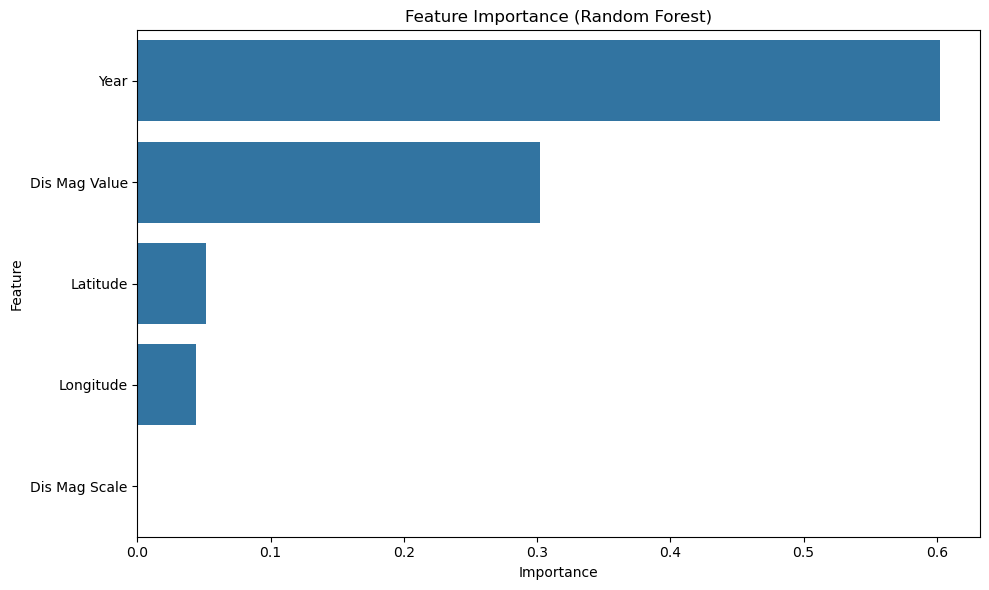

In [28]:
# 8. Feature Importance (for Random Forest)
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

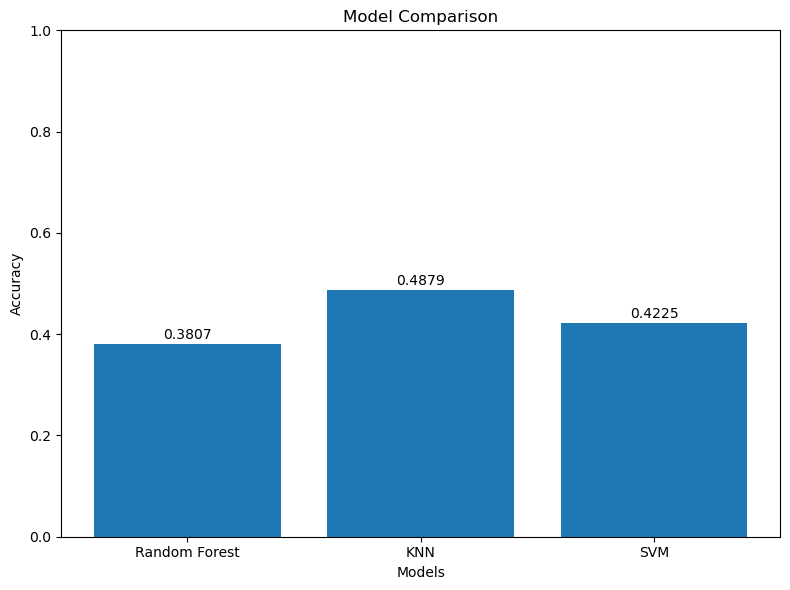

In [29]:
# 9. Simple comparison plot
models = ['Random Forest', 'KNN', 'SVM']
accuracies = [rf_accuracy, knn_accuracy, svm_accuracy]

plt.figure(figsize=(8, 6))
plt.bar(models, accuracies)
plt.title('Model Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center')
plt.tight_layout()
plt.show()